In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../../data/raw/test.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
usefullColumn = ['Id','LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'YearBuilt', 'OverallQual', 'OverallCond', 'ExterQual', 'KitchenQual', 'GarageQual', 'BsmtQual', 'Neighborhood', 'MSZoning', 'YearRemodAdd', 'GarageYrBlt', 'Fireplaces', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr']
df = df[usefullColumn]
df

,LotArea,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,YearBuilt,OverallQual,OverallCond,...,BsmtQual,Neighborhood,MSZoning,YearRemodAdd,GarageYrBlt,Fireplaces,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr
0,11622,896,882.0,896,0,730.0,140,1961,5,6,...,TA,NAmes,RH,1961,1961.0,0,0.0,1,2,1
1,14267,1329,1329.0,1329,0,312.0,393,1958,6,6,...,TA,NAmes,RL,1958,1958.0,0,0.0,1,3,1
2,13830,1629,928.0,928,701,482.0,212,1997,5,5,...,Gd,Gilbert,RL,1998,1997.0,1,0.0,2,3,1
3,9978,1604,926.0,926,678,470.0,360,1998,6,6,...,TA,Gilbert,RL,1998,1998.0,1,0.0,2,3,1
4,5005,1280,1280.0,1280,0,506.0,0,1992,8,5,...,Gd,StoneBr,RL,1992,1992.0,0,0.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,1092,546.0,546,546,0.0,0,1970,4,7,...,TA,MeadowV,RM,1970,NaN,0,0.0,1,3,1
1455,1894,1092,546.0,546,546,286.0,0,1970,4,5,...,TA,MeadowV,RM,1970,1970.0,0,0.0,1,3,1
1456,20000,1224,1224.0,1224,0,576.0,474,1960,5,7,...,TA,Mitchel,RL,1996,1960.0,1,1.0,1,4,1
1457,10441,970,912.0,970,0,0.0,80,1992,5,5,...,Gd,Mitchel,RL,1992,NaN,0,0.0,1,3,1


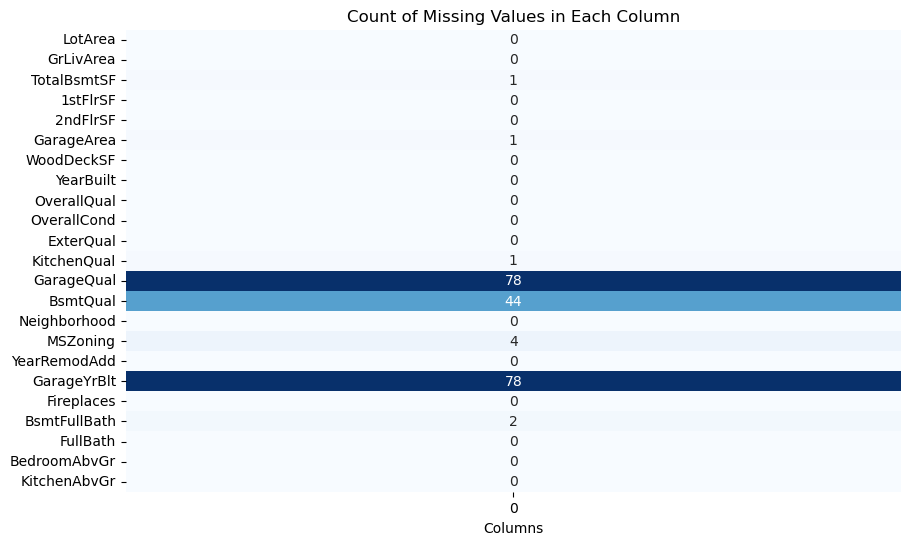

In [5]:
missing_values = df.isna().sum()
fig_missing_values = plt.figure(figsize=(10, 6))
sns.heatmap(missing_values.to_frame(), cmap='Blues', annot=True, fmt='d', cbar=False)
plt.title('Count of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('')
plt.show()

In [6]:
df = df.dropna(subset=['GarageQual', 'BsmtQual', 'GarageYrBlt', 'KitchenQual', 'MSZoning'])
df

,LotArea,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,YearBuilt,OverallQual,OverallCond,...,BsmtQual,Neighborhood,MSZoning,YearRemodAdd,GarageYrBlt,Fireplaces,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr
0,11622,896,882.0,896,0,730.0,140,1961,5,6,...,TA,NAmes,RH,1961,1961.0,0,0.0,1,2,1
1,14267,1329,1329.0,1329,0,312.0,393,1958,6,6,...,TA,NAmes,RL,1958,1958.0,0,0.0,1,3,1
2,13830,1629,928.0,928,701,482.0,212,1997,5,5,...,Gd,Gilbert,RL,1998,1997.0,1,0.0,2,3,1
3,9978,1604,926.0,926,678,470.0,360,1998,6,6,...,TA,Gilbert,RL,1998,1998.0,1,0.0,2,3,1
4,5005,1280,1280.0,1280,0,506.0,0,1992,8,5,...,Gd,StoneBr,RL,1992,1992.0,0,0.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,13384,1360,1104.0,1360,0,336.0,160,1969,5,5,...,TA,Mitchel,RL,1979,1969.0,1,1.0,1,3,1
1452,1533,1092,546.0,546,546,286.0,0,1970,4,5,...,TA,MeadowV,RM,1970,1970.0,0,0.0,1,3,1
1455,1894,1092,546.0,546,546,286.0,0,1970,4,5,...,TA,MeadowV,RM,1970,1970.0,0,0.0,1,3,1
1456,20000,1224,1224.0,1224,0,576.0,474,1960,5,7,...,TA,Mitchel,RL,1996,1960.0,1,1.0,1,4,1


In [36]:
df.rename(columns={
    'LotArea': 'Surface_logement',
    'GrLivArea': 'Surface_habitable',
    'TotalBsmtSF': 'Surface_basement',
    '1stFlrSF': 'Surface_1ere_plan',
    '2ndFlrSF': 'Surface_2eme_plan',
    'GarageArea': 'Surface_garage',
    'WoodDeckSF': 'Surface_pavage',
    'YearBuilt': 'Annee_construction',
    'ExterQual': 'Qualite_exterieure',
    'KitchenQual': 'Qualite_cuisine',
    'GarageQual': 'Qualite_garage',
    'BsmtQual': 'Qualite_basement',
    'Neighborhood': 'Quartier',
    'MSZoning': 'Type_zone',
    'YearRemodAdd': 'Annee_remodage',
    'GarageYrBlt': 'Annee_garage',
    'Fireplaces': 'Nombre_chemines',
    'BsmtFullBath': 'Nombre_basement_baignoire',
    'FullBath': 'Nombre_baignoire',
    'BedroomAbvGr': 'Nombre_chambres_par_etage',
    'KitchenAbvGr': 'Nombre_cuisine_par_etage'
})

,Surface_logement,Surface_habitable,Surface_basement,Surface_1ere_plan,Surface_2eme_plan,Surface_garage,Surface_pavage,Annee_construction,OverallQual,OverallCond,...,Qualite_basement,Quartier,Type_zone,Annee_remodage,Annee_garage,Nombre_chemines,Nombre_basement_baignoire,Nombre_baignoire,Nombre_chambres_par_etage,Nombre_cuisine_par_etage
0,11622,896,882.0,896,0,730.0,140,1961,5,6,...,TA,NAmes,RH,1961,1961.0,0,0.0,1,2,1
1,14267,1329,1329.0,1329,0,312.0,393,1958,6,6,...,TA,NAmes,RL,1958,1958.0,0,0.0,1,3,1
2,13830,1629,928.0,928,701,482.0,212,1997,5,5,...,Gd,Gilbert,RL,1998,1997.0,1,0.0,2,3,1
3,9978,1604,926.0,926,678,470.0,360,1998,6,6,...,TA,Gilbert,RL,1998,1998.0,1,0.0,2,3,1
4,5005,1280,1280.0,1280,0,506.0,0,1992,8,5,...,Gd,StoneBr,RL,1992,1992.0,0,0.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,13384,1360,1104.0,1360,0,336.0,160,1969,5,5,...,TA,Mitchel,RL,1979,1969.0,1,1.0,1,3,1
1452,1533,1092,546.0,546,546,286.0,0,1970,4,5,...,TA,MeadowV,RM,1970,1970.0,0,0.0,1,3,1
1455,1894,1092,546.0,546,546,286.0,0,1970,4,5,...,TA,MeadowV,RM,1970,1970.0,0,0.0,1,3,1
1456,20000,1224,1224.0,1224,0,576.0,474,1960,5,7,...,TA,Mitchel,RL,1996,1960.0,1,1.0,1,4,1


In [37]:
df.to_csv('../../data/processed/test.csv', index=False)